In [1]:
import cv2
import numpy as np
import math
import sys
import io
import matplotlib.pyplot as plt

In [2]:
# local imports
from cell_detection import extract_grid_cells
from textExtraction import cell_to_letter_easyocr3 as cell_to_letter
from edgeDetection import find_edges
#sys.stdout = io.TextIOWrapper(sys.stdout.buffer, encoding='utf-8')

Using CPU. Note: This module is much faster with a GPU.


In [3]:
file_path = "board2.jpg"
img = cv2.imread(file_path)

number of Hough lines: 76
Number of filtered lines: 32


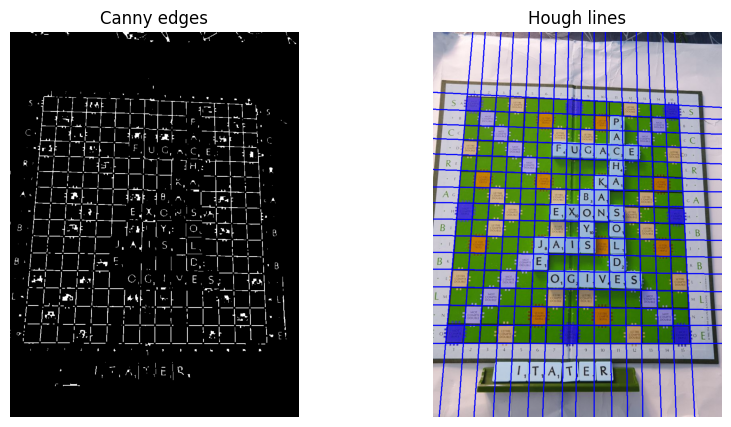

In [4]:
filtered_lines, debug_img, edges = find_edges(img, "edges")
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) 
axes[0].imshow(edges, cmap='gray')
axes[0].set_title("Canny edges")
axes[0].axis('off')

axes[1].imshow(debug_img)
axes[1].set_title("Hough lines")
axes[1].axis('off')

plt.show()

In [ ]:
cells, debug_img = extract_grid_cells(img, filtered_lines)
plt.plot()
plt.imshow(debug_img)
plt.title("cells")
plt.axis('off')
print("number of cells :", len(cells))

number of cells : 225


C:\Users\JeanPaloma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


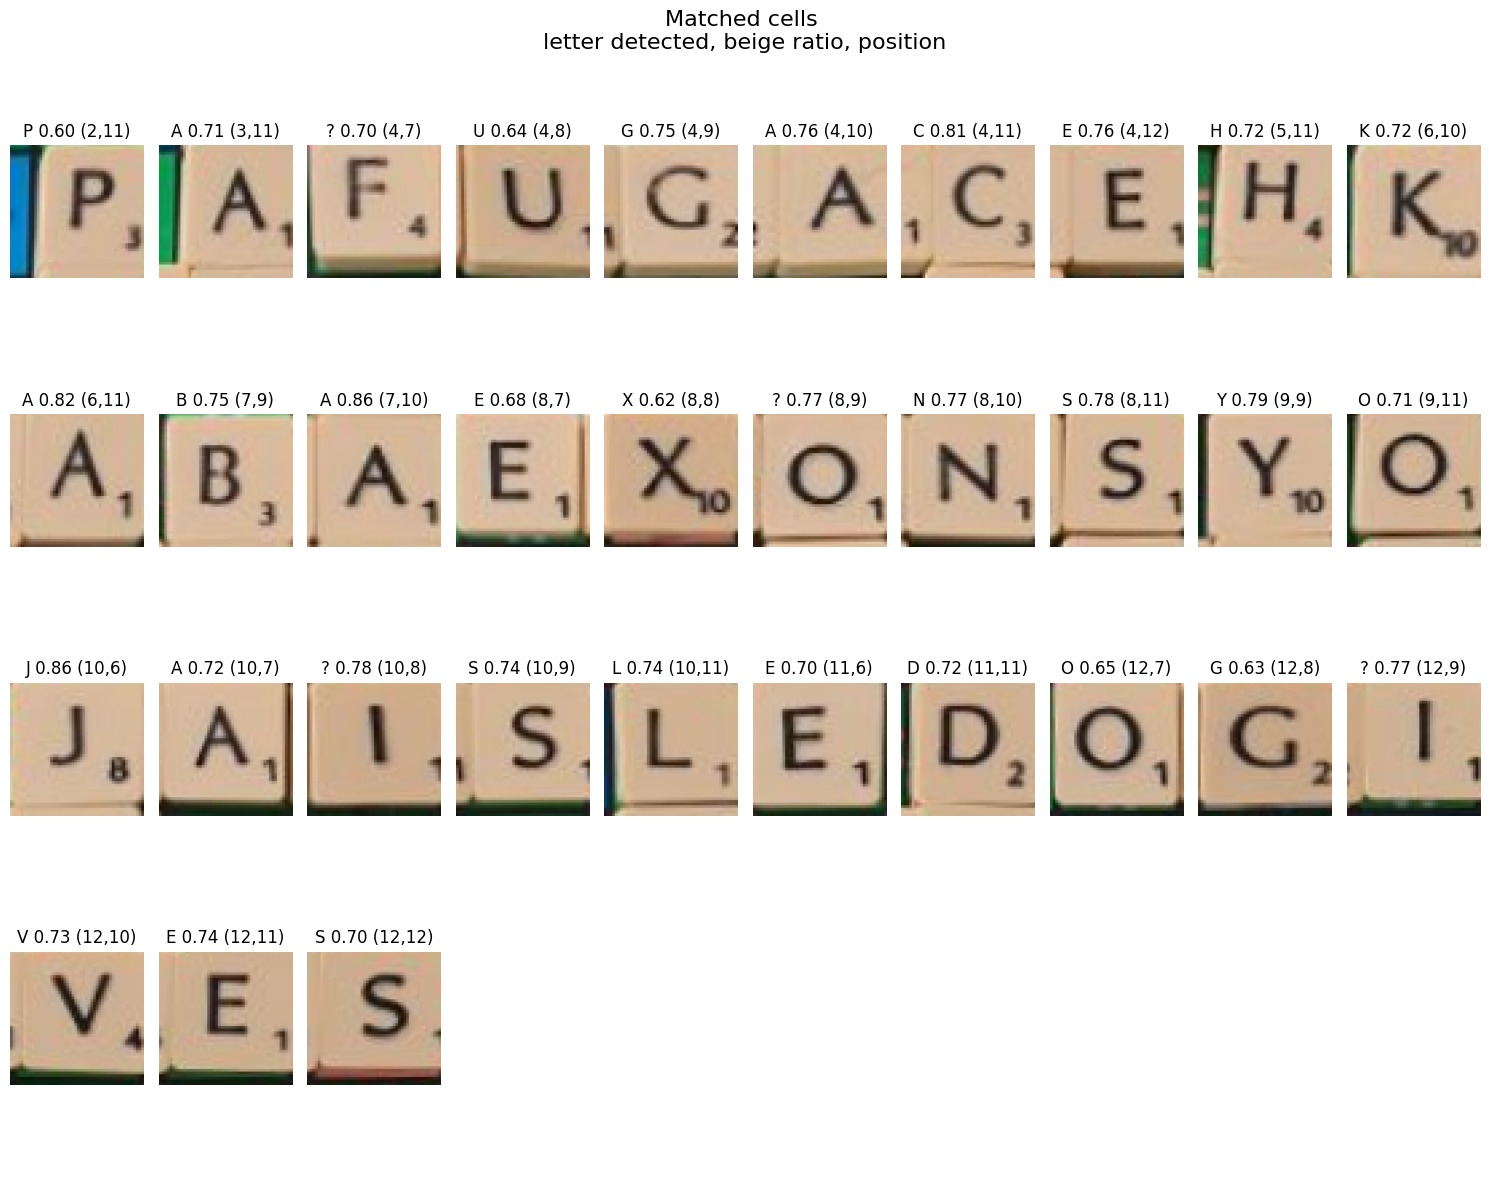

In [6]:
matched = []

for index, cell_img in enumerate(cells):
    hsv = cv2.cvtColor(cell_img, cv2.COLOR_BGR2HSV)
    beige_thresh = cv2.inRange(hsv, (9.5, 40, 177), (19.5, 90, 247))
    height, width = cell_img.shape[:2]
    ratio = np.count_nonzero(beige_thresh)/(height*width)

    if ratio > 0.2:
        letter, image_edited = cell_to_letter(hsv)
        resized = cv2.resize(cell_img, (height*5, width*5), interpolation=cv2.INTER_AREA)
        if letter == "":
            letter = "?"
        matched.append((resized, f"{letter} {ratio:.2f} ({index//15+1},{index%15+1})"))

cols = 10
rows = -(-len(matched) // cols)
fig, axes = plt.subplots(rows, cols, figsize=(15, 3*rows))

for ax, (img, title) in zip(axes.flat, matched):
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_title(title)
    ax.axis("off")

for ax in axes.flat[len(matched):]:
    ax.axis("off")

fig.suptitle("Matched cells \nletter detected, beige ratio, position", fontsize=16)
plt.tight_layout()
plt.show()